In [1]:
print("Hello World")

Hello World


In [2]:
with open('api_keys.txt', 'r') as api_key_file:
   api_key = api_key_file.read().strip()

In [3]:
%pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
endpoint = "https://api.fda.gov/food/enforcement.json"

params = {
    'search':'reason_for_recall:"egg"',
    'limit': 500
}

headers = {
    'Content-Type': 'application/json',
    'api_key': api_key
}

response = requests.get(endpoint, params=params, headers=headers)

if response.status_code == 200:
    data = response.json()
else:
    print("Error:", response.status_code)

In [12]:
import pandas as pd

results = data.get('results', [])

df = pd.DataFrame(results)

In [13]:
print(df)

           country              city                      address_1  \
0    United States            Kearns                  4850 S 5300 W   
1    United States         La Crosse                    1626 Oak St   
2    United States          Brooklyn                   4120 2nd Ave   
3    United States        Pittsburgh                   101 Kappa Dr   
4    United States            Austin       601 N Lamar Blvd Ste 300   
..             ...               ...                            ...   
495  United States            Austin                   550 Bowie St   
496  United States  Santa Fe Springs                 13409 Orden Dr   
497  United States             Bronx                  3958 Park Ave   
498  United States          Glendale                    601 Vine St   
499  United States              Kent  23444 30th Ave S., Space #104   

                                     reason_for_recall address_2  \
0    Condies Foods is recalling Veggie Cups due to ...             
1    Kwik T

Text(0.5, 1.0, 'Count of Recalls for Egg-Related Product Issues by Classification')

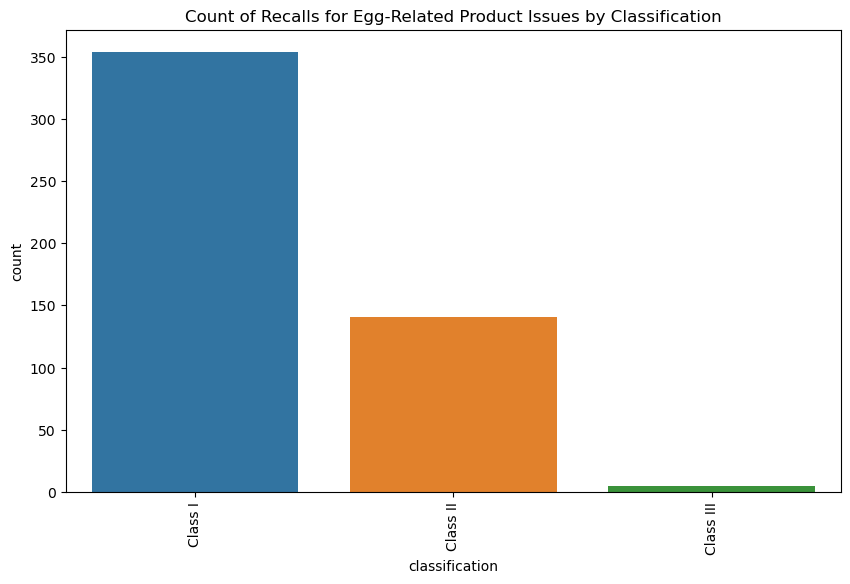

In [14]:
category_order = df['classification'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(df, x="classification", order = category_order)
plt.xticks(rotation=90) 
plt.title("Count of Recalls for Egg-Related Product Issues by Classification")

In [15]:
df.to_csv('FDA_egg_stats.csv', index=False)